<a href="https://colab.research.google.com/github/LuellaS/testRepo/blob/main/Praca_domowa2_24_11_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline


**Simple visualization and classification of the digits dataset**
=============================================================

Do a simple MLP classification of 28x28 MNIST dataset

*Marcin Wolter*



In [ ]:
#import packages and load datasets

import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
import numpy as np
from sklearn.model_selection import train_test_split


# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X / 255.


# split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33, train_size=0.5)




Plot the data: images of digits
-------------------------------

Each data in a 28x28 image

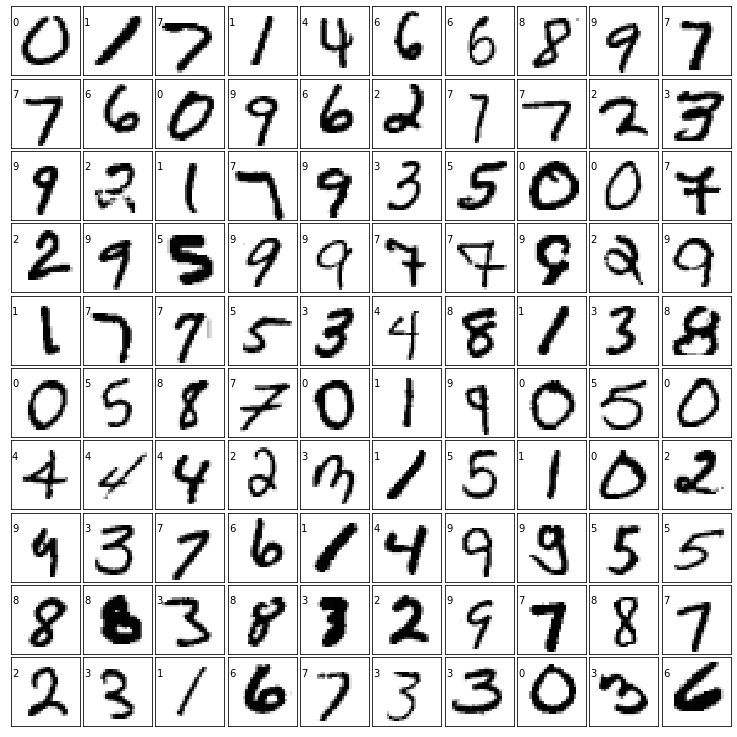

In [ ]:
# leave empty for time beeing

## **Classify with MLP**

In [ ]:

# tu musimy zdefiniować klasyfikator, wytrenowaći sprawdzić "score" dla 
# danych testowych
#Proponowane parametry sieci: ukryte warstwy [100,100],solver adam, verbose=10 
clf = MLPClassifier(hidden_layer_sizes=(10,10), solver='adam', verbose=10, validation_fraction=0.2, early_stopping=True)
                     
print(clf.fit(X_train, y_train))

# get score
score = clf.score(X_test, y_test)
print("Score = ",score)

# use the model to predict the labels of the test data
predicted = clf.predict(X_test)
expected = y_test




Iteration 1, loss = 1.57782766
Validation score: 0.719286
Iteration 2, loss = 0.70322004
Validation score: 0.819429
Iteration 3, loss = 0.51204782
Validation score: 0.858714
Iteration 4, loss = 0.42137931
Validation score: 0.883143
Iteration 5, loss = 0.36843579
Validation score: 0.894000
Iteration 6, loss = 0.33356026
Validation score: 0.902429
Iteration 7, loss = 0.31053986
Validation score: 0.902571
Iteration 8, loss = 0.29438830
Validation score: 0.907429
Iteration 9, loss = 0.28204458
Validation score: 0.909429
Iteration 10, loss = 0.27192744
Validation score: 0.910714
Iteration 11, loss = 0.26412634
Validation score: 0.911857
Iteration 12, loss = 0.25582996
Validation score: 0.915429
Iteration 13, loss = 0.24908546
Validation score: 0.918429
Iteration 14, loss = 0.24380382
Validation score: 0.916714
Iteration 15, loss = 0.23910444
Validation score: 0.916143
Iteration 16, loss = 0.23370986
Validation score: 0.918000
Iteration 17, loss = 0.22952733
Validation score: 0.919286
Iterat

# **Plot loss**
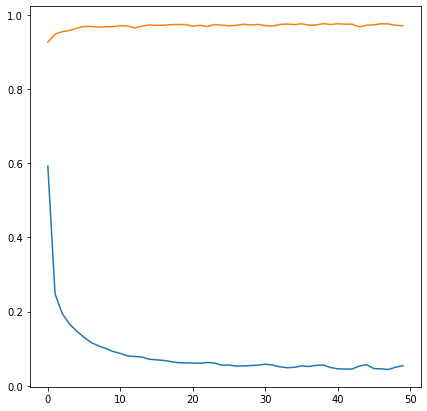

[0.7192857142857143, 0.8194285714285714, 0.8587142857142858, 0.8831428571428571, 0.894, 0.9024285714285715, 0.9025714285714286, 0.9074285714285715, 0.9094285714285715, 0.9107142857142857, 0.9118571428571428, 0.9154285714285715, 0.9184285714285715, 0.9167142857142857, 0.9161428571428571, 0.918, 0.9192857142857143, 0.9172857142857143, 0.9212857142857143, 0.9207142857142857, 0.9212857142857143, 0.9221428571428572, 0.9225714285714286, 0.9244285714285714, 0.924, 0.9244285714285714, 0.9238571428571428, 0.9252857142857143, 0.9257142857142857, 0.9252857142857143, 0.9272857142857143, 0.925, 0.9261428571428572, 0.9274285714285714, 0.9282857142857143, 0.9257142857142857, 0.9262857142857143, 0.926, 0.9281428571428572, 0.9277142857142857, 0.926, 0.9274285714285714, 0.9294285714285714, 0.9272857142857143, 0.9302857142857143, 0.9257142857142857, 0.928, 0.9297142857142857, 0.9255714285714286, 0.9278571428571428, 0.9278571428571428, 0.9284285714285714, 0.9261428571428572, 0.9278571428571428, 0.92771428

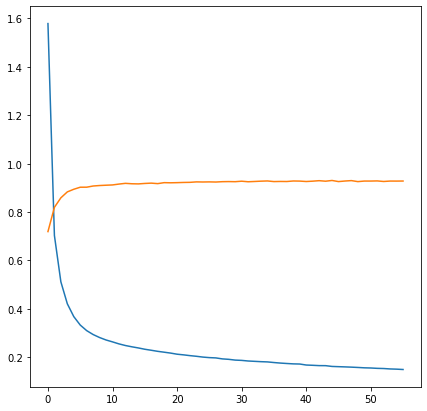

In [ ]:
# tu rysujemy loss i validation score
# zostawiamy na razie puste
fig=plt.figure(figsize=(7,7))

plt.plot(clf.loss_curve_)
#Warning: thiscan be usedonly if early_stopping=True
print(clf.validation_scores_)
plt.plot(np.asarray(clf.validation_scores_))

plt.show()

#**Plot results**
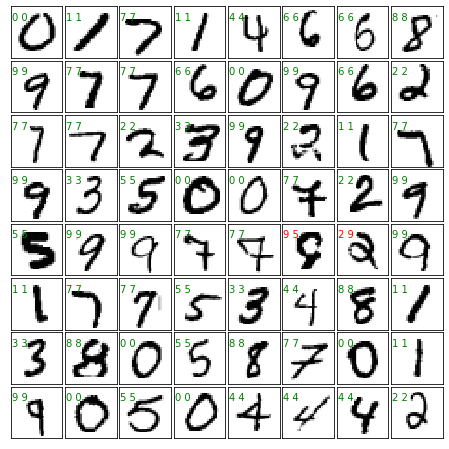

In [ ]:
# Plot the prediction

# Tu rysujemy cyfry z wynikami
# na razie zostawiamy puste

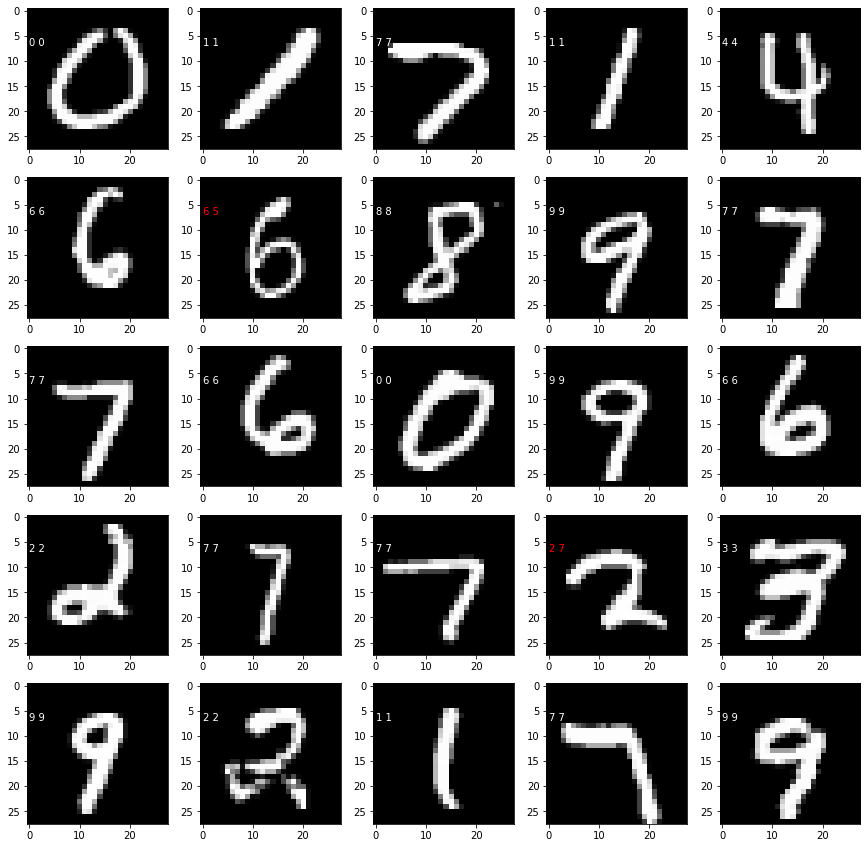

In [ ]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(15, 15)) # figure size in inches
 
for i in range(25):
 ax = fig.add_subplot(5, 5, i + 1)
 ax.imshow(X_test[i].reshape(28,28), cmap=plt.cm.gray, interpolation='nearest')
 if expected[i]==predicted[i]:
    ax.text(0, 7, str(expected[i])+" "+str(predicted[i]), color='white')
 else:
    ax.text(0, 7, str(expected[i])+" "+str(predicted[i]), color='red')    

Print the classification report



In [ ]:
from sklearn import metrics
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      3409
           1       0.96      0.97      0.97      3949
           2       0.92      0.93      0.92      3500
           3       0.92      0.90      0.91      3557
           4       0.90      0.94      0.92      3398
           5       0.92      0.90      0.91      3203
           6       0.93      0.95      0.94      3444
           7       0.94      0.94      0.94      3637
           8       0.92      0.90      0.91      3437
           9       0.92      0.90      0.91      3466

    accuracy                           0.93     35000
   macro avg       0.93      0.93      0.93     35000
weighted avg       0.93      0.93      0.93     35000



# **Print the confusion matrix (expected true label vs. the reconstructed label)**



In [ ]:
print(metrics.confusion_matrix(expected, predicted))



[[3295    0   17    5    9   19   36   10   12    6]
 [   2 3839   30   17    6    7    3    8   28    9]
 [  37   20 3241   32   29    2   38   52   44    5]
 [  11   17   90 3185    6   95   13   41   62   37]
 [   6   12   12    3 3206    6   50   26   14   63]
 [  28   16   16   81   21 2877   57   10   54   43]
 [  21   20   20    2   67   37 3261    2   14    0]
 [  14   18   32   12   45   11    0 3422    7   76]
 [  19   44   53   72   15   54   40   10 3091   39]
 [  20   12    6   42  157   22    1   70   24 3112]]


# **Repeat the same classification for faces**

In [ ]:

####################################################
# Load dataset with faces
from sklearn.datasets import fetch_lfw_people

# #############################################################################
# Download the data, if not already on disk and load it as numpy arrays

lfw_people = fetch_lfw_people(min_faces_per_person=100, resize=0.50)  
print(lfw_people.images.shape)


# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
# to get real names, not digits
target_names = lfw_people.target_names

# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

print("Image shape: ",X_train.shape)
# dimension of face image
nfaces, h, w = lfw_people.images.shape
print("Image shape: ", h, w)

(1140, 62, 47)
Image shape:  (855, 2914)
Image shape:  62 47


Plot the data: images of faces
-------------------------------

Each data in a 32x24 image

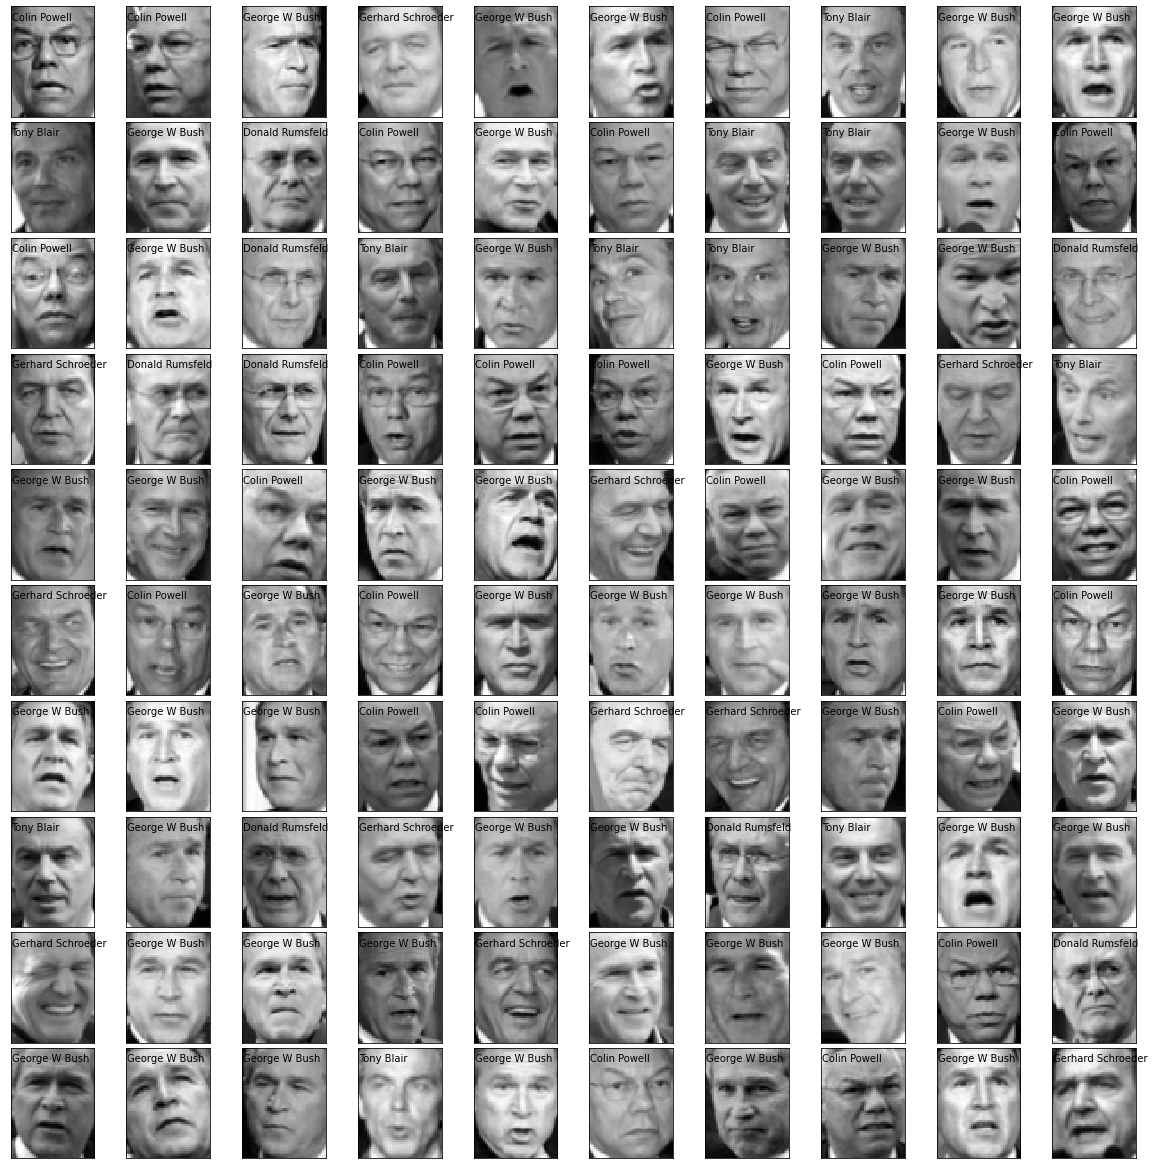

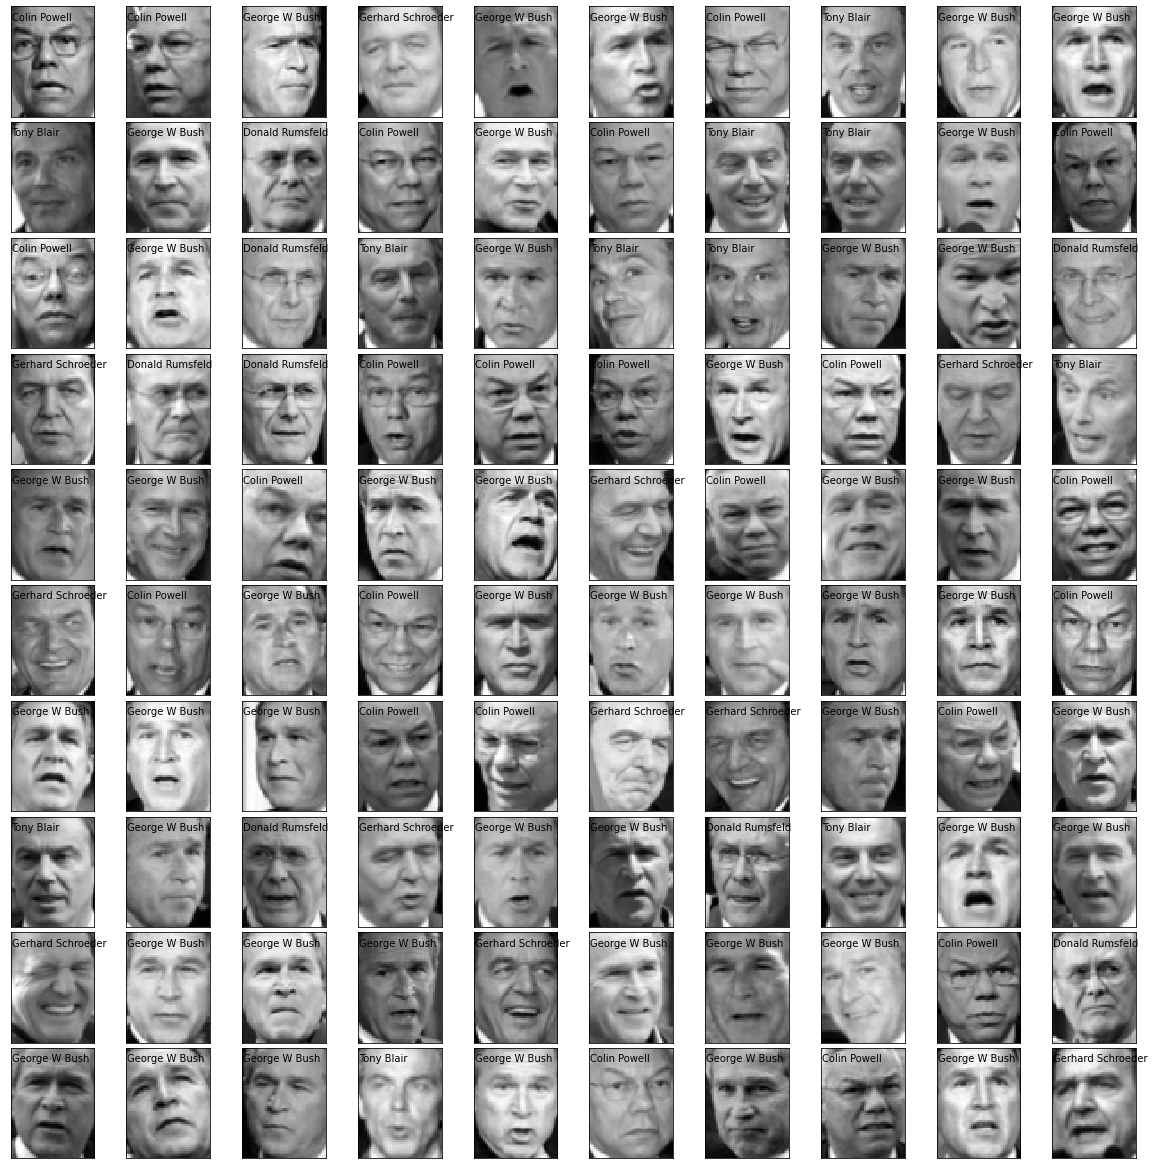

In [ ]:
#import packages and load datasets

import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
import numpy as np
from sklearn.model_selection import train_test_split

# tu rysujemy twarze
# tu rysujemy twarze
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(16, 16)) # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
 
for i in range(100):
 ax = fig.add_subplot(10, 10, i + 1, xticks=[], yticks=[])
 ax.imshow(X_test[i].reshape(h,w), cmap=plt.cm.gray, interpolation='nearest')
 # label the image with the target value
 ax.text(0, 7, str(target_names[y_test[i]]))


## **Classify with MLP**

In [ ]:

# train the model
# tu musimy zdefiniować klasyfikator, wytrenowaći sprawdzić "score" dla 
# danych testowych
#Proponowane parametry sieci: ukryte warstwy [100,100],solver adam, verbose=10 
clf = MLPClassifier(hidden_layer_sizes=(100,100), solver='adam', alpha=0.1, verbose=10, validation_fraction=0.2, early_stopping=True,n_iter_no_change=50)
                     
print(clf.fit(X_train, y_train))

# get score
score = clf.score(X_test, y_test)
print("Score = ",score)

# use the model to predict the labels of the test data
predicted = clf.predict(X_test)
expected = y_test




Iteration 1, loss = inf
Validation score: 0.111111
Iteration 2, loss = inf
Validation score: 0.497076
Iteration 3, loss = inf
Validation score: 0.099415
Iteration 4, loss = 107.10587736
Validation score: 0.497076
Iteration 5, loss = inf
Validation score: 0.421053
Iteration 6, loss = inf
Validation score: 0.485380
Iteration 7, loss = 80.91945968
Validation score: 0.128655
Iteration 8, loss = 35.68999376
Validation score: 0.105263
Iteration 9, loss = 38.33039571
Validation score: 0.350877
Iteration 10, loss = 36.21032825
Validation score: 0.520468
Iteration 11, loss = 20.20878174
Validation score: 0.508772
Iteration 12, loss = 27.18174879
Validation score: 0.362573
Iteration 13, loss = 19.57058796
Validation score: 0.368421
Iteration 14, loss = 18.45805995
Validation score: 0.385965
Iteration 15, loss = 21.08628638
Validation score: 0.508772
Iteration 16, loss = 17.47062027
Validation score: 0.514620
Iteration 17, loss = 14.97346778
Validation score: 0.397661
Iteration 18, loss = 17.8299

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


# **Plot loss**

[0.1111111111111111, 0.49707602339181284, 0.09941520467836257, 0.49707602339181284, 0.42105263157894735, 0.4853801169590643, 0.1286549707602339, 0.10526315789473684, 0.3508771929824561, 0.52046783625731, 0.5087719298245614, 0.36257309941520466, 0.3684210526315789, 0.38596491228070173, 0.5087719298245614, 0.5146198830409356, 0.39766081871345027, 0.2631578947368421, 0.4327485380116959, 0.5672514619883041, 0.6023391812865497, 0.4269005847953216, 0.36257309941520466, 0.43859649122807015, 0.5847953216374269, 0.5029239766081871, 0.6374269005847953, 0.5497076023391813, 0.6140350877192983, 0.3333333333333333, 0.4853801169590643, 0.4093567251461988, 0.5555555555555556, 0.3157894736842105, 0.6257309941520468, 0.5964912280701754, 0.52046783625731, 0.5789473684210527, 0.5497076023391813, 0.5672514619883041, 0.43859649122807015, 0.5263157894736842, 0.631578947368421, 0.6608187134502924, 0.47953216374269003, 0.4853801169590643, 0.6198830409356725, 0.6023391812865497, 0.6140350877192983, 0.7251461988

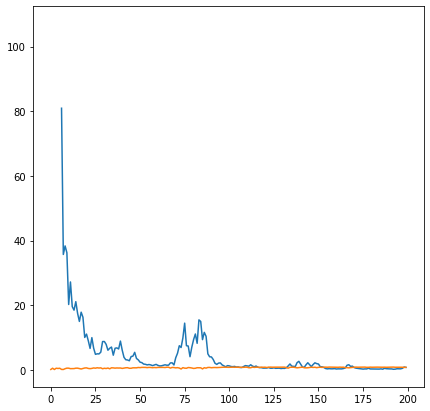

In [ ]:
# tu rysujemy loss i validation score
# zostawiamy na razie puste
fig=plt.figure(figsize=(7,7))

plt.plot(clf.loss_curve_)
#Warning: thiscan be usedonly if early_stopping=True
print(clf.validation_scores_)
plt.plot(np.asarray(clf.validation_scores_))

plt.show()

# **Plot results**


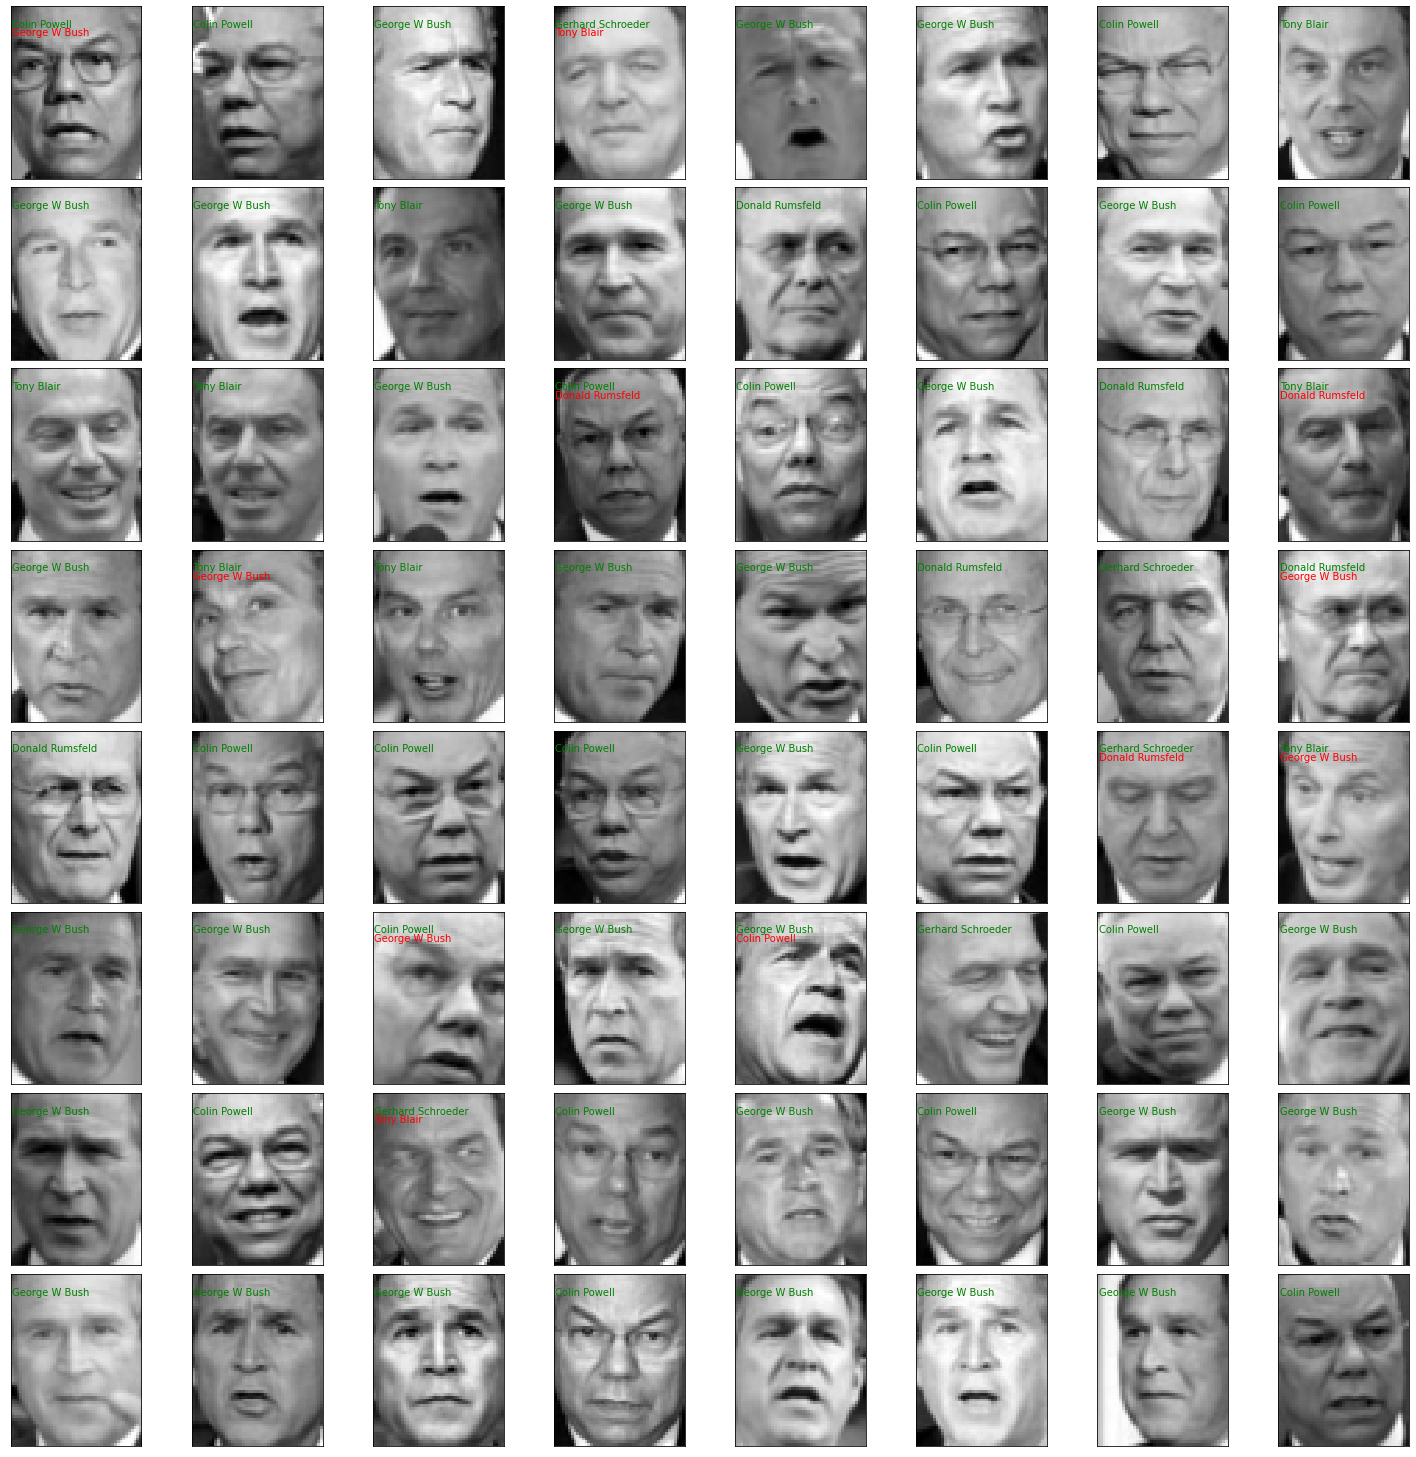

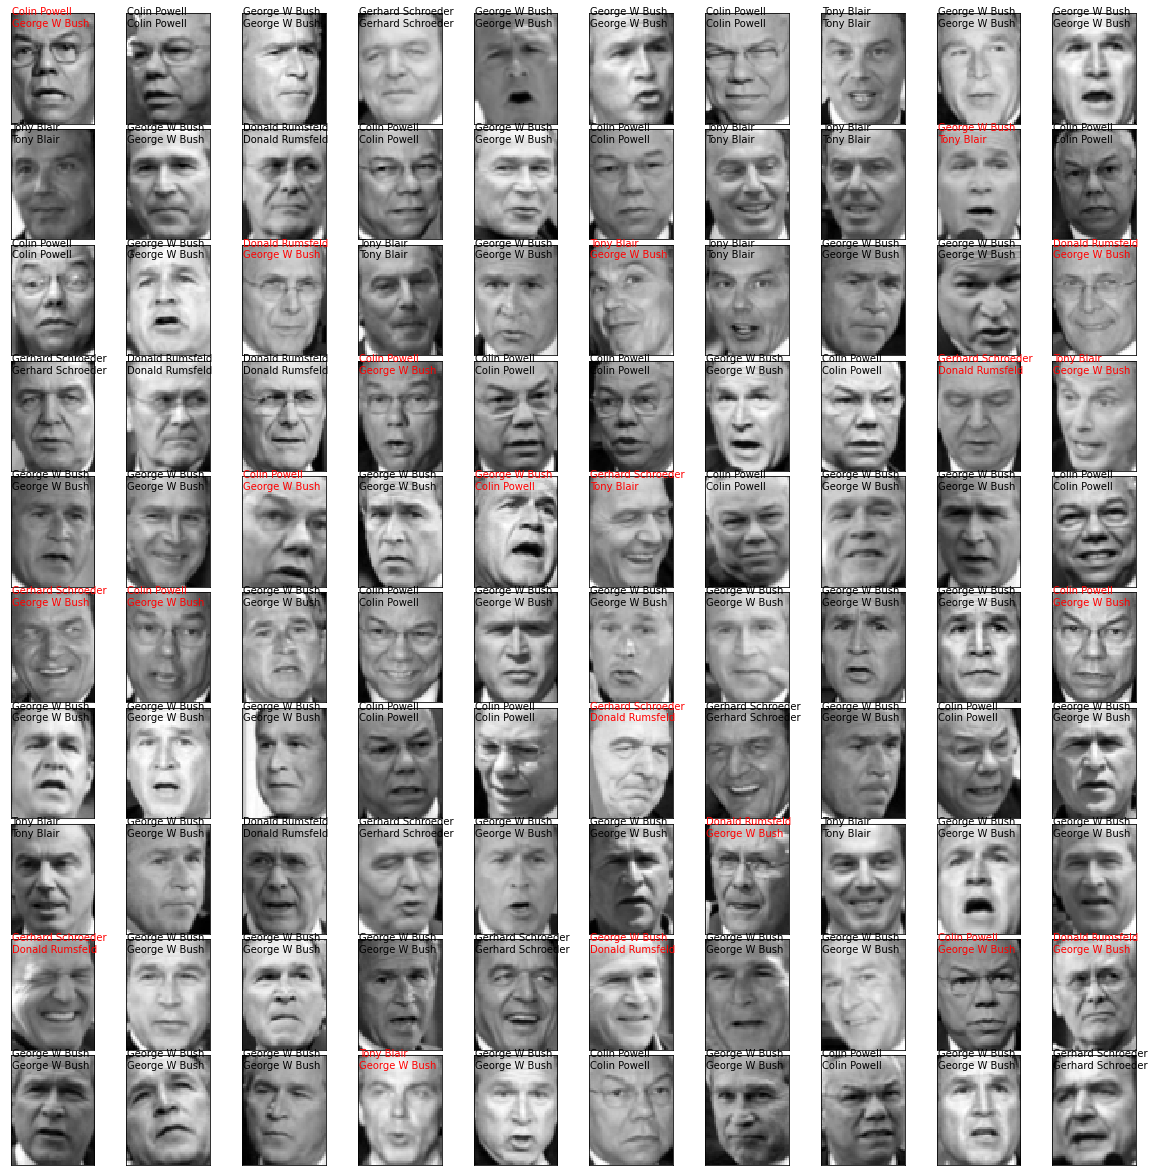

In [ ]:
# Plot the prediction
#import packages and load datasets

import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
import numpy as np
from sklearn.model_selection import train_test_split

# tu rysujemy twarze
# tu rysujemy twarze
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(16, 16)) # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
 
for i in range(100):
 ax = fig.add_subplot(10, 10, i + 1, xticks=[], yticks=[])
 ax.imshow(X_test[i].reshape(h,w), cmap=plt.cm.gray, interpolation='nearest')
 # label the image with the target value
 if expected[i]==predicted[i]:
    ax.text(0, 7, str(target_names[expected[i]])+" \n"+str(target_names[predicted[i]]), color='black')
 else:
     ax.text(0, 7, str(target_names[expected[i]])+" \n"+str(target_names[predicted[i]]), color='red')
 


Print the classification report



In [ ]:
from sklearn import metrics
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       0.90      0.83      0.86        64
           1       0.69      0.62      0.66        32
           2       0.79      0.93      0.86       127
           3       0.85      0.59      0.69        29
           4       0.86      0.73      0.79        33

    accuracy                           0.81       285
   macro avg       0.82      0.74      0.77       285
weighted avg       0.82      0.81      0.81       285



# **Print the confusion matrix (expected true label vs. the reconstructed label)**



In [ ]:
print(metrics.confusion_matrix(expected, predicted))



[[ 53   0  11   0   0]
 [  1  20   9   1   1]
 [  2   5 118   1   1]
 [  2   4   4  17   2]
 [  1   0   7   1  24]]
